![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/collab/Classifiers/NLU_Toxic_Classification_Example.ipynb)

# Toxic text classification with NLU



# 1. Install Java and


In [6]:
import os
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install nlu > /dev/null    


# 2. Load toxic model and predict classes for sample string

In [7]:
import nlu
toxic_pipe  = nlu.load('en.classify.toxic')
toxic_pipe.predict('You are to stupid')

multiclassifierdl_use_toxic download started this may take some time.
Approximate size to download 11.7 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


,sentence_embeddings,toxic_confidence,toxic,sentence
origin_index,,,,
0,"[-0.03398505970835686, 0.0007853527786210179, ...",0.978273,toxic,You are to stupid
0,None,0.978273,insult,None


# 3. Download sample dataset

In [8]:
# Download the dataset 
! wget -N https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv -P /tmp
import pandas as pd
df = pd.read_csv('/tmp/train-balanced-sarcasm.csv')


--2020-11-09 08:09:36--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.92.158
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.92.158|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘/tmp/train-balanced-sarcasm.csv’ not modified on server. Omitting download.



# 4. Predict on pandas dataset and visualize predictions



In [9]:
toxic_pipe  = nlu.load('en.classify.toxic')
df['text'] = df['comment']
toxic_predictions = toxic_pipe.predict(df['text'].iloc[0:1000], output_level='sentence')
toxic_predictions

multiclassifierdl_use_toxic download started this may take some time.
Approximate size to download 11.7 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
INFO: NLU will assume text as label column since default text column could not be find


,toxic,sentence_embeddings,sentence
origin_index,,,
0,None,"[-0.06570463627576828, -0.03522053360939026, -...",NC and NH.
1,None,"[-0.0254225991666317, 0.05448468029499054, -0....",You do know west teams play against west teams...
2,None,"[-0.0035701016895473003, -0.030124755576252937...","They were underdogs earlier today, but since G..."
3,None,"[0.06464719027280807, -0.023972542956471443, -...","This meme isn't funny none of the ""new york ni..."
4,None,"[0.028676817193627357, 0.0199710875749588, 0.0...",I could use one of those tools.
...,...,...,...
996,None,"[0.0263528935611248, -0.06056991219520569, -0....",Imagine showing that to someone a little over ...
997,None,"[0.07649341225624084, 0.05448545515537262, -0....",I wish Schumer and Reid had not endorsed Keith...
998,toxic,"[0.049849480390548706, -0.054164644330739975, ...","yeah, god forbid jesse look out for his fans b..."


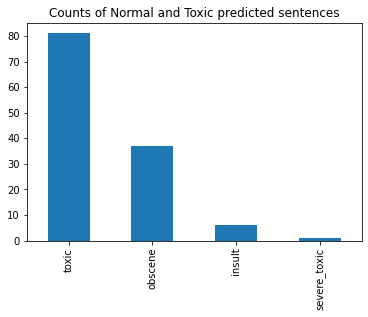

In [10]:
toxic_predictions.explode('toxic').toxic.value_counts().plot.bar(title='Counts of Normal and Toxic predicted sentences')